# Fitting a line with PyTorch NNs

In [1]:
import torch
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

from torch.optim.lr_scheduler import StepLR

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


In [3]:
x = (torch.arange(50) + 1.0).to(device)
d = x + 2 * (torch.rand(50).to(device)) - 1

# Add extra dimension for NN input
x = x.unsqueeze(1)
d = d.unsqueeze(1)

In [ ]:
# Create network
network = torch.nn.Linear(1, 1).to(device)

# Use SGD optimizer
optimizer = torch.optim.SGD(network.parameters(), lr=0.001)

# Adjust learnng rate over time
scheduler = StepLR(optimizer, step_size=2000, gamma=0.9)

# Mean squared error loss function
loss_func = torch.nn.MSELoss()

In [5]:
for t in range(1000):
    # Forward pass
    y = network(x)
    loss = loss_func(y, d)
    
    if (t % 100 == 0):
        print(f"Iteration {t}: loss = {loss.item()}")
        
    # Zero gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()
    scheduler.step()

Iteration 0: loss = 1979.755126953125
Iteration 100: loss = 0.27964863181114197
Iteration 200: loss = 0.27897217869758606
Iteration 300: loss = 0.2783583402633667
Iteration 400: loss = 0.2778013050556183
Iteration 500: loss = 0.27729564905166626
Iteration 600: loss = 0.2768368422985077
Iteration 700: loss = 0.2764202654361725
Iteration 800: loss = 0.2760424017906189
Iteration 900: loss = 0.2756989896297455


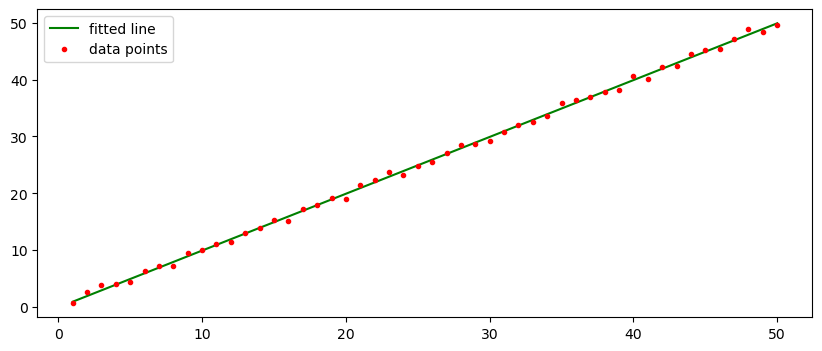

In [6]:
plt.figure(figsize=(10,4))

plt.plot(x.detach().cpu(), y.detach().cpu(), 'g-', label='fitted line')
plt.plot(x.detach().cpu(), d.detach().cpu(), 'r.', label='data points')

plt.legend()
plt.show()